In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2023-05-26 04:14:34.447103: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-26 04:14:35.489122: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model = tf.keras.models.load_model('model.h5')

2023-05-26 04:14:36.857369: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-26 04:14:36.889373: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-26 04:14:36.890238: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [4]:
model.inputs

[<KerasTensor: shape=(None, 180, 180, 3) dtype=float32 (created by layer 'rescaling_1_input')>]

In [5]:
import cv2

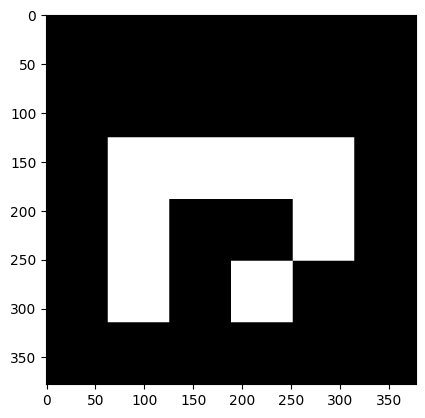

In [12]:
image = "1.png"

img = cv2.imread(image)
plt.imshow(img)
img.resize(1,180,180,3)

# normalize
img = img.astype('float32')
img = img / 255.0

In [13]:
res = model.predict(img)

1/1 [==============================] - 0s 18ms/step


In [16]:
res

array([[ 0.56957144,  0.6202182 ,  1.1774722 ,  0.74710345, -0.50635237,
         0.05731307, -0.03418183, -0.7453643 , -0.3142971 ]],
      dtype=float32)

In [17]:
class_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
score = tf.nn.softmax(res[0])
print(score)
print(np.argmax(score))
print(class_names[np.argmax(score)])


tf.Tensor(
[0.13790552 0.14506987 0.25327343 0.1646959  0.04702339 0.08262485
 0.07540063 0.03702647 0.05698   ], shape=(9,), dtype=float32)
2
3


<BarContainer object of 9 artists>

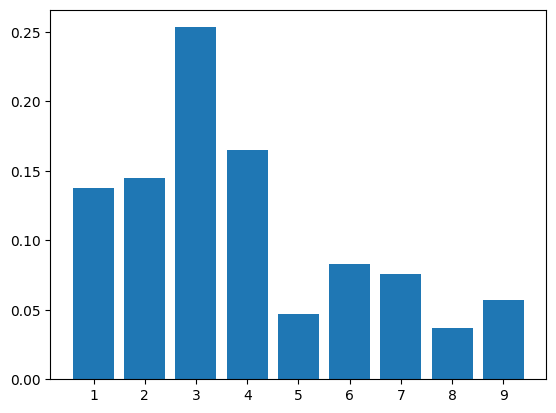

In [20]:
# bargraph score with class names
plt.bar(class_names, score)